<a href="https://colab.research.google.com/github/shyoonCS/DataAnalysis/blob/main/Report202502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

문제 1-2. API 호출코드 작성

In [2]:
import requests
import pandas as pd

url = "http://openapi.seoul.go.kr:8088/4446516e7973687936367073734f62/json/energyUseDataSummaryInfo/1/5"
api_key = '4446516e7973687936367073734f62'
year_from = 2015
year_to = 2024

params = {
    'KEY': api_key,
    'TYPE': 'json',
    'SERVICE': 'energyUseDataSummaryInfo',
    'START_INDEX': '1',
    'END_INDEX': '9999',
    'YEAR': '2024',
    'MON': '12'
}

## 년도 생성
def get_year_months():
  year_months = []
  for year in range(year_from, year_to+1):
    for month in range(1,12+1):
      year_months.append((f'{year}', f'{month:02d}'))
  return year_months

data = []
cnt_req = 0
cnt_ok = 0
cnt_fail = 0
for year_month in get_year_months() :
  # URL 생성
  url_ym = url + '/' + year_month[0] + '/' + year_month[1]

  ## API 호출 &  데이터 수집
  response = requests.get(url_ym, params=params)
  cnt_req = cnt_req + 1
  if response.status_code == 200:
    cnt_ok = cnt_ok + 1
    data = data + response.json()['energyUseDataSummaryInfo']['row']
  else:
    cnt_fail = cnt_fail + 1

## 호출 결과 출력
print(f"API 결과 : 호출 횟수 : {cnt_req}, 성공 횟수 : {cnt_ok}, 실패 횟수 : {cnt_fail}, 상태코드 : {response.status_code}")

API 결과 : 호출 횟수 : 120, 성공 횟수 : 120, 실패 횟수 : 0, 상태코드 : 200


문제 2-1. DataFrame으로 변환하고, 데이터의 기본 정보를 출력

In [3]:
## 호출 결과 출력
df = pd.DataFrame(data)
#df.to_csv('data.csv', index=False, encoding='utf-8')
#df.to_excel('data.xlsx', index=False)
#df.describe()
#df.info()
df.head()

,YEAR,MON,MM_TYPE,CNT,EUS,EUS1,EUS2,ECO2_1,ECO2_2,GUS,...,WUS1,WUS2,WCO2_1,WCO2_2,HUS,HUS1,HUS2,HCO2_1,HCO2_2,REG_DATE
0,2015,01,개인,767791,193784708,194781915,204969429,-6090964,-2582568.736,59133720,...,12723680.426,12899476.73,8179.308,2715.530256,22740838.937,23400055.303,27090493.875,-2504435.652,-33660084.213069,2015-06-04 17:03:55.0
1,2015,01,학교,1382,134955565,128707423,145561511,-2178902,-923854.448,9107197,...,2097433.8,2133200.8,-39498.1,-13113.3692,0,0,0,0,0,2015-06-04 17:03:55.0
2,2015,01,종교단체,32,372270,363376,411363,-15099.5,-6402.188,53331,...,4548,4519,1411.5,468.618,0,0,0,0,0,2015-06-04 17:03:55.0
3,2015,01,소상공인,2058,10249618,9927610,11039593,-233983.5,-99209.004,536119,...,146480.6,147325.6,369.9,122.8068,0,0,0,0,0,2015-06-04 17:03:55.0
4,2015,01,공동주택관리소,1747,327102096,329852334,351694752,-13671447,-5796693.528,22834274,...,12763070,12979835.8,-26645.4,-8846.2728,0,0,0,0,0,2015-06-04 17:03:55.0


문제 2-2. Data 전처리 : 연도(year)와 계절(season) 컬럼 추가

In [5]:
# 연도컬럼 추가 : YEAR 기 존재, 생략
#df['REG_DATE'] = pd.to_datetime(df['REG_DATE'])
#df['YEAR2'] = df['REG_DATE'].dt.year
#df.info()
#df.head()

# 계절(SEASON) 컬럼 추가
def f_season(MON) :
  if MON in ['03','04','05'] :
    return '봄'
  elif MON in ['06','07','08'] :
    return '여름'
  elif MON in ['09','10','11'] :
    return '가을'
  elif MON in ['12','01','02'] :
    return '겨울'
  else :
    return 'N/A'

df['SEASON'] = df['MON'].apply(f_season)
#df


문제 3-1. Data 시각화 : 연도별 에너지 사용 총 사용량(전기+가스+수도+지역난방)의 변화

In [9]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


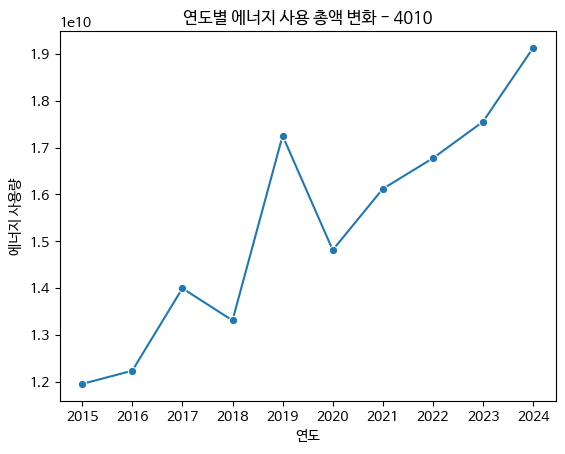

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns #matplotlib 확장

df['EUS'] = pd.to_numeric(df['EUS'])
df['GUS'] = pd.to_numeric(df['GUS'])
df['WUS'] = pd.to_numeric(df['WUS'])
df['HUS'] = pd.to_numeric(df['HUS'])
df['TOTAL'] = df['EUS'] + df['GUS'] + df['WUS'] + df['HUS']
df_total = df.groupby('YEAR')[['TOTAL','EUS','GUS','WUS','HUS']].sum()
#print(df_total)
df_total.to_excel('total.xlsx')

#plt.figure(figsize=(12, 6))
sns.lineplot(data=df_total, x='YEAR', y='TOTAL', marker='o')
plt.title("연도별 에너지 사용 총액 변화 - 4010")
plt.xlabel("연도")
plt.ylabel("에너지 사용량")
plt.show()


 문제 3-2. 계절별 가스 사용량 평균

In [35]:
df_gas = df.groupby('SEASON')['GUS'].mean()
#계절별 소팅
season_order = ['봄', '여름', '가을', '겨울']
df_gas['SEASON'] = pd.Categorical(df_gas['SEASON'], categories = season_order, ordered = True )

# 정렬
# df_gas.sort_values('SEASON')


KeyError: 'SEASON'